In [1]:
import datetime as dt

from IPython.core.display import HTML, display
import os
def hide_code(auto=False):
    """
    Provides a button to click to hide the code 
    
    Parameters
    ----------
    auto: (boolean) whether to hide the code when this function is called

    Notes
    -----
    Call the function at the end of a cell or
    use the display function from IPython.core.display display the HTML
    """
    auto_str = '//' if not auto else ''
    return HTML('''<script>
    code_show=true; 
    function code_toggle() {{
     if (code_show){{
     $('div.input').hide();
     }} else {{
     $('div.input').show();
     }}
     code_show = !code_show
    }}
    {auto}$(document).ready(code_toggle);
    </script>
    <a href="javascript:code_toggle()">Code AK {year}</a>.'''.format(
        auto=auto_str, year=dt.datetime.now().year))

### 1.Analysing feature behaviour based on synthetic data

In [2]:

import json
import pandas as pd
import numpy as np
np.set_printoptions(precision=3, suppress=True)
import os
import matplotlib.pyplot as plt
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import seaborn as sns
from mpl_toolkits.mplot3d import axes3d

In [52]:
doc_path= ('/home/ak/Documents/Data/')
figures_path= ('/home/ak/Documents/Research/Papers/figures/')
os.listdir(figures_path)

['intradaydistribution.png',
 'explore-proxy-vr.png',
 'im_trace.png',
 'determ_average_sequence.png',
 'hmm-abc.f7.gnuplot',
 'gaussian_example.png',
 'hmm-abc.f4.gnuplot',
 'gumbel_example.png',
 'HeatMap_UpperTailDependence20120823.png',
 'generativekernel1.png',
 'JointPlot.png',
 'SVR with epsilon.png',
 'im_determinant.png',
 'trellis_graph.synctex.gz(busy)',
 'QQQKDEDurationDistos.png',
 'JPYChronoDurationNonZeroPrcReturn.png',
 'JPYACFNZTradeDurationTC.png',
 'QQQScatterplot_TradeClock.png',
 'tradevolGE.png',
 'EEMKDEDurationDistos.png',
 'EEMKDENonZrClock.png',
 'frank_example.png',
 'Price Trends.png',
 'autocorrelationGE.png',
 'determ_seq.png',
 'hmm-abc.f5.gnuplot',
 'hmm_large.png',
 'features_dim.png',
 'durationvolcompGE.png',
 'simple_flowchart.aux',
 'generative2.png',
 'error_fischer_polar.png',
 'EEMKACFVol.png',
 'clayton_example.png',
 'trellis_graph.tex',
 'multiple_models.png',
 'EEMKACFTClockDur.png',
 '10.png',
 'Error_Trace.png',
 'JPYChronoDurationZeroPrcRe

In [3]:
##helper functions for plotting##
def plot_set(df):
    for i in [1,5,10,100]:
        x= np.asarray(df.iloc[:,10*i].expanding().mean())
        plt.plot(x,linestyle='--', label =str(10*i)+'-slices')

def plot_single_sequence(df, seq_no):
    x= np.asarray(df.iloc[:,seq_no].index)
    y=df.iloc[:,seq_no].expanding(10).mean()
    error=y.expanding(seq_no).std()
    plt.plot(x, y, 'k-',linewidth=0.9)
    plt.fill_between(x, y-error, y+error, alpha=0.8, edgecolor='#1B2ACD', facecolor='#fff4f2',
                         linewidth=0.4, linestyle='dashdot', antialiased=False)
    
    plt.legend([str(seq_no)+'-th time slice'])

def plot_single_sequence_error(df, seq_no):
    x= np.asarray(df.iloc[:,seq_no].index)
    y=df.iloc[:,seq_no].expanding(1).mean()
    error=y.expanding(seq_no).std()
    plt.plot(x, error, linestyle='dashdot',linewidth=0.9, color='r')
    plt.legend([str(seq_no)+'-th time slice '])

## Two states with skewed transition matrix favouring one state and static parameters that are sufficiently apart. We create state sequences of fixed length and for every fixed length sequence we generate M copies of observation data from the observation distribution.¶


In [4]:
ticker = 'SYNT_2states'
main_path = '/home/ak/Data/features_models/'
file_name = 'synthetic_study_' + str(ticker)
os.listdir(main_path)

['fischer_polar_len10000states2.npy',
 'fixed_states_len10000_states4.npy',
 'im_metrics_len10000states3.npy',
 'fischer_polar_10k_2s.npy',
 'all_features_10k_2s.npy',
 'fischer_polar_len10000states4.npy',
 'ksi_metrics_10k_2s.npy',
 'all_features.npy',
 'fixed_states_len10000_states3.npy',
 'ksi_metrics_len10000states3.npy',
 'im_metrics_stats3.npy',
 'all_features3.npy',
 'predictions',
 'fischer_polar_coords3.npy',
 'ksi_metrics_len10000states2.npy',
 'labels',
 'im_metrics_len10000states2.npy',
 'im_metrics_len10000states4.npy',
 'models',
 'ksi_metrics_len10000states4.npy',
 'im_metrics_long_small.npy',
 'im_metrics_10k_2s.npy',
 'fixed_states3.npy',
 'ksi_metrics_long_small.npy',
 'fischer_polar_long_small.npy',
 'fixed_states_len10000_states2.npy',
 'features',
 'fischer_polar_len10000states3.npy',
 'ksi_metrics_stats3.npy']

In [5]:
#search only for npy files+make a list --> will use this later
npy_files=[s for s in os.listdir(main_path) if s.endswith('states2.npy')]
npy_files

['fischer_polar_len10000states2.npy',
 'ksi_metrics_len10000states2.npy',
 'im_metrics_len10000states2.npy',
 'fixed_states_len10000_states2.npy']

In [6]:
npy_files[0]

'fischer_polar_len10000states2.npy'

In [7]:


#load bot matrix and vector valued
ksi_metrics =np.load(main_path+str(npy_files[1])).item()
im_metrics =np.load(main_path+str(npy_files[2])).item()
fischer_polar =np.load(main_path+str(npy_files[0]))
states = np.load(main_path+str(npy_files[3]))

dfs = [ksi_metrics, im_metrics, fischer_polar]
metrics_keys=ksi_metrics.keys()
metrics_keys


['spectral', 'determ', 'trace']

In [12]:

#3 copies, #10k, #2states
ksi_determinant =pd.DataFrame(ksi_metrics['determ'].T)
fischer_polar.shape

(3, 10000, 3)

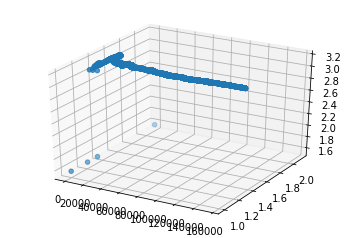

In [11]:

i=1
rho = pd.DataFrame(fischer_polar[i]).iloc[:,0].values
phi1 = pd.DataFrame(fischer_polar[i]).iloc[:,1].values
phi2 = pd.DataFrame(fischer_polar[i]).iloc[:,2].values
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#shape: copies x sequence x number of inputs
ax.scatter(rho, phi1, phi2)
plt.show()

In [13]:
k=0
rho=pd.DataFrame(fischer_polar[k]).iloc[:,0].values
phi_1=pd.DataFrame(fischer_polar[k]).iloc[:,1].values
phi_2=pd.DataFrame(fischer_polar[k]).iloc[:,2].values



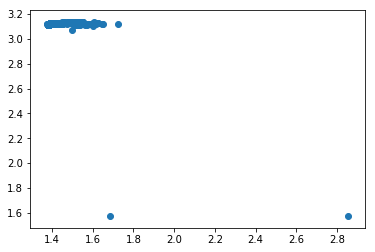

In [18]:
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='2d')
#shape: copies x sequence x number of inputs
plt.scatter(phi_1, phi_2)
plt.show()

In [20]:

df_fischer['states']=states
df_fischer_state0= df_fischer[df_fischer['states'] == 0]
df_fischer_state1= df_fischer[df_fischer['states'] == 1]

In [37]:
df_fischer_state0.shape[0]

6040

/home/ak/virtualenvs/DataAnalysis/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


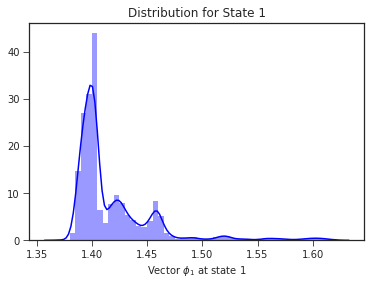

/home/ak/virtualenvs/DataAnalysis/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


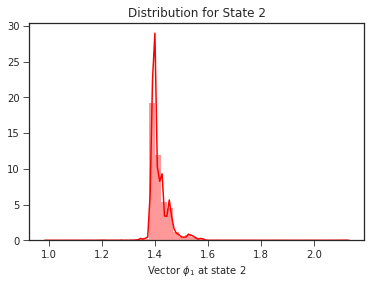

In [54]:
k=1
# Set up the matplotlib figure
sns.despine(left=True)
sns.distplot(df_fischer_state0[k], kde=True, color="b")
title_1 = 'Vector '+r'$\phi_'+str(k)+'$ at state 1'
plt.title('Distribution for State 1')
plt.xlabel(title_1)
plt.savefig(figures_path+title_1+'.png') 
plt.show()
sns.distplot(df_fischer_state1[k], kde=True, color="r")
title_2 = 'Vector '+r'$\phi_'+str(k)+'$ at state 2'
plt.title('Distribution for State 2')
plt.xlabel(title_2)
plt.show()

In [54]:
state1_phi1=pd.DataFrame(df_fischer_state0.iloc[:,1])
state2_phi1=pd.DataFrame(df_fischer_state1.iloc[:,1])

In [55]:
state2_phi1.shape

(3960, 1)

In [29]:
plt.figure(figsize=(45,24))
df= pd.DataFrame(fischer_polar[0])
sns.set_style('ticks')
# sns.set(rc={'figure.figsize':(11.7,8.27)})
g=sns.FacetGrid(df, col ="states")
g.map(sns.distplot, 2);
axes=g.axes.flatten()
axes = g.axes.flatten()
axes[0].set_title("State 0")
axes[0].set_ylabel("Frequency")
axes[0].set_xlabel("")
axes[1].set_title("State 1")
axes[1].set_xlabel("")
axes[0].set_xlim(2,)
axes[1].set_xlim(2,)

KeyError: 'states'

<Figure size 3240x1728 with 0 Axes>